# Part I: Importing Libraries and retrieval/download of files from GovCanada webpage

* *Part I running time: ~20 mins*

##  Import libraries

In [5]:
# Data analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Web scraping and file retrieval
import io
import sys
import os
import glob
import urllib.request
import json
import time
import datetime
import wget

# Database processing
import sqlite3
import dask.dataframe as dd

# Visualization and geo-data imports
import geopandas as gpd

# Plotly libraries
!pip install pystan==2.19.1.1
!pip install plotly

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

#import plotly.edf_masterpress as pdf_master

# Offline mode
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


# Hyperlink / Web display
from IPython.core.display import display, HTML

# Formatting options
pd.options.display.float_format = '{:,.3f}'.format
np.set_printoptions(precision=2)

# Turn on time execution extension

"""
try:
    %reload_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
    
"""

print('Library imports complete!')

Library imports complete!


## Create color chart schemes for Plotly Histogram Charts

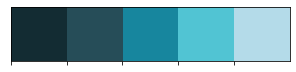

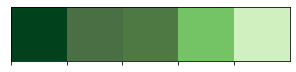

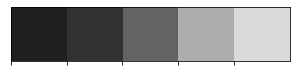

In [6]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

## Create Plotly Histogram Charts

In [7]:
# Read hydro file to DataFrame

os.chdir(r'C:/Users/pdudar/anaconda3/projects/CanadaWatQual/Hydro/CanadaDaily/og')

f = r'CAN_daily_hydrometric_master.csv'
df_final = pd.read_csv(f, low_memory=False)

In [9]:
os.chdir(r'C:/Users/pdudar/anaconda3/projects/CanadaWatQual/Hydro/CanadaDailyHydrometricHistograms')

pd.options.display.float_format = '{:,.1f}'.format

len_stations = len(df_final.STATION.unique())

l = 0
k = 1   

start = datetime.datetime.now()

d_plotly = dict(tuple(df_final.groupby(['STATION'])))

# Set STATION column as dictionary key for DataFrames
for key in d_plotly.keys():
    d_plotly[key] = df_final[:][df_final.STATION == key]
    
    # df_export_plotly is a DataFrame that uses PROVINCE, ID and NAME
    # of hydrometric station as its unique key
    df_export_plotly = d_plotly[key]
    
    # Generate a Plotly TimeSeries chart for each monitoring station
    fig_ii = px.histogram(df_export_plotly, 
        x="FLOWRATE_CMS", 
        title=key+": Flow Rate Histogram",
        template='plotly_white',
        marginal='box', 
        opacity=0.7, 
        color_discrete_sequence=[colors_green[3], colors_blue[3]],
        barmode='group', 
        histnorm='percent')
    
    #fig_ii.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

    fig_ii.update_layout(
        font_family='monospace',
        title=dict(text=key + ': Histogram - Probability Density of Flowrates', x=0.5, y=0.95,
            font=dict(color=colors_dark[2], size=20)),
                xaxis_title_text='Flowrate (cms)',
                yaxis_title_text='Probability (%)',
                legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],
                    borderwidth=0,tracegroupgap=5),
                bargap=0.3

    )
    
    # Append STATION key to .html files
    fig_ii.write_html(key + '.html', include_plotlyjs='cdn')
    #fig_ii.write_image(key + '.png', bbox_inches='tight')
    
    print('{} seconds: Completed {} Plotly Histogram charts..'.format((datetime.datetime.now() - start).seconds, k))
    if l == len_stations:
        break
    else:
        l+=1

    k+=1
    
print('Histogram charts complete!')

7 seconds: Completed 1 Plotly Histogram charts..
9 seconds: Completed 2 Plotly Histogram charts..
11 seconds: Completed 3 Plotly Histogram charts..
12 seconds: Completed 4 Plotly Histogram charts..
14 seconds: Completed 5 Plotly Histogram charts..
16 seconds: Completed 6 Plotly Histogram charts..
17 seconds: Completed 7 Plotly Histogram charts..
19 seconds: Completed 8 Plotly Histogram charts..
21 seconds: Completed 9 Plotly Histogram charts..
22 seconds: Completed 10 Plotly Histogram charts..
24 seconds: Completed 11 Plotly Histogram charts..
26 seconds: Completed 12 Plotly Histogram charts..
27 seconds: Completed 13 Plotly Histogram charts..
29 seconds: Completed 14 Plotly Histogram charts..
31 seconds: Completed 15 Plotly Histogram charts..
33 seconds: Completed 16 Plotly Histogram charts..
35 seconds: Completed 17 Plotly Histogram charts..
37 seconds: Completed 18 Plotly Histogram charts..
38 seconds: Completed 19 Plotly Histogram charts..
40 seconds: Completed 20 Plotly Histogram 

## Zip all Histogram charts to .zip folder

In [ ]:
# Compress all Plotly.html files to .zip folder
import os
import glob
import zipfile
try:
    import zlib
    mode = zipfile.ZIP_DEFLATED
except:
    mode = zipfile.ZIP_STORED

file_path = r'C:/Users/pdudar/anaconda3/projects/CanadaWatQual/Hydro/CanadaDailyHydrometricHistograms'
zipfile_path = r'C:/Users/pdudar/anaconda3/projects/CanadaWatQual/Hydro/CanadaDailyHydrometricHistograms/daily_hydro_plotly_histogram_html.zip'
plotly_zip = zipfile.ZipFile(zipfile_path, 'w', mode)

for folder, subfolders, files in os.walk(file_path):
    for file in files:
        if file.endswith('.html'):
            # Write all .html files to .zip file
            plotly_zip.write(os.path.join(folder, file), compress_type=mode)
# Close the .zip file and end process                             
plotly_zip.close()

# Delete all leftover .html files in /CanadaDailyHydrometricPlotly folder
folder = r'C:/Users/pdudar/anaconda3/projects/CanadaWatQual/Hydro/CanadaDaily/CanadaDailyHydrometricHistogram/*.*'
for CleanUp in glob.glob(folder):
    print(CleanUp)
    
    # If the file is not a .zip, delete the file (.html)
    if CleanUp.endswith('*.html'):    
        os.remove(CleanUp)
        
print('Flow charts zipped to .zip file!')